<a href="https://colab.research.google.com/github/Princess-Mcdonald/Ai-School-Team3-Titanic-Project/blob/main/Princess_Team3_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modules Import**


In [2]:
from collections import Counter #This method returns the list of elements in the counter.
import string

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## **Datasets Import**
###  Brief description on the 'Training' and 'Testing' dataset.
######  ---A training dataset is an initial dataset that teaches the ML models to identify desired patterns or perform a particular task, On this we can train different machine learning algorithms in hopes of finding the best fit for the problem to be solved.

######--- The testing data is the dataset on which the model that has been trained, on the training dataset is accurate enough to solve the problem at hand.

In [3]:
train = pd.read_csv('/content/AI-school-main/Titanic Project/titanic/train.csv')
test = pd.read_csv('/content/AI-school-main/Titanic Project/titanic/test.csv')

In [4]:
titanic = pd.concat([train, test]) #Concat function was used here to combine dataframes along rows or columns. Think of it as stacking up multiple dataframes. 

## **Checking out the train and test dataset.**
####Checking the first and last 5 rows of the dataset to understand the type of dataset we are workingt on.

In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking the dataset helps to confirm that all the columns are the right datatypes.

In [8]:
train.info()#The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Checking for missing values**
####--- Using the **.isnull().sum()** method, we iterate through the columns, counting for each column how many null values there are and produce a new dataframe which displays the sum of isnull values alongside the column header names.

In [9]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

It was discovered above that, the survived, age, cabin and embarked columns contain missing values.
These have to be handled before feeding the data into a machine learning model.

##**Statistical Summary**
-- Statistical summary compile and provide information about your sample data. It tells you something about the values in your data set. This includes where the mean lies and whether your data is skewed.

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### **EDA**
---It full meaning is Exploratory Data Analysis, this involves using visualization and statistical methods to analyze data and bring the important parts of data into focus.

### **Survival Rate**

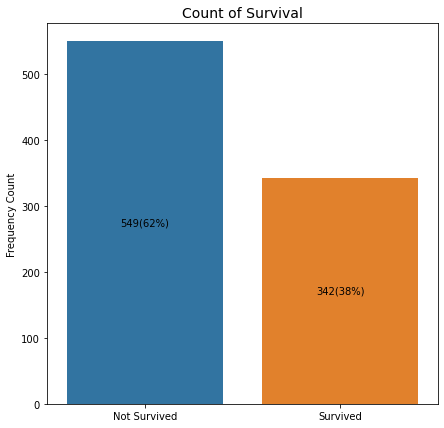

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    x= train["Survived"].value_counts().index, y=train["Survived"].value_counts(), 
    data=train
)

ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_ylabel("Frequency Count")
ax.set_title("Count of Survival", fontsize=14)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' +
        '{:.0%}'.format(bar.get_height() / len(train.Survived)) + ')',
        horizontalalignment='center', verticalalignment='center', color='black'
    )

This plot gives us an overview information that 
<br>
62% of the passengers did not survive, while <br>
38% survived

## **Embarked Count**

Text(0.5, 0, 'Cities')

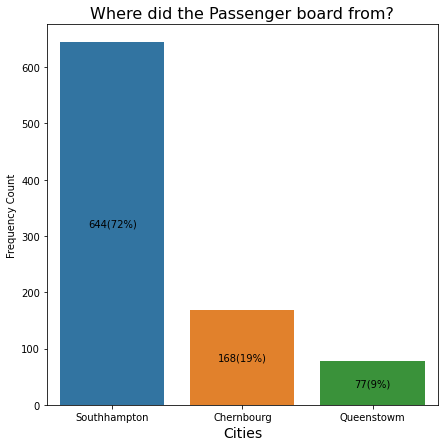

In [14]:
fig, embarked = plt.subplots(figsize=(7, 7))

sns.barplot(
    x=train['Embarked'].value_counts().index,
    y=train['Embarked'].value_counts()
)
embarked.set_xticklabels(['Southhampton', 'Chernbourg', 'Queenstowm'])
embarked.set_ylabel("Frequency Count")
embarked.set_title("Embarked Count")

for bar in embarked.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    embarked.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' + '{:.0%}'.format(bar.get_height() / len(train["Embarked"])) + ')', 
        horizontalalignment='center', verticalalignment='center', color='black')

embarked.set_title("Where did the Passenger board from?", fontsize=16)
embarked.set_xlabel("Cities", fontsize=14)
    

Here, it is make evident that a large percentage of the passengers on the ship boarded from Sounthhampton with 72%, Chernbourg(19%), Queenstown(9%)


##**Categories Variables Count**

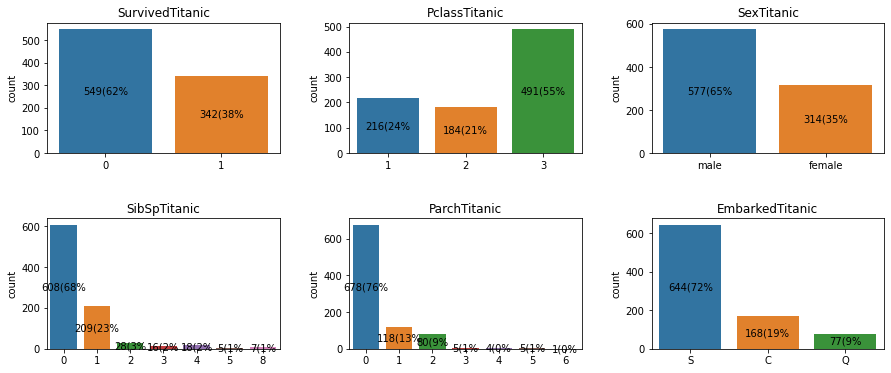

In [15]:
fig, myplot = plt.subplots(figsize=(15, 6), nrows=2, ncols=3)

cat_features = [
    'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', "Embarked"
]

row, col, num_cols = 0, 0, 3

for feature in cat_features:
    sns.barplot(
        x=train[feature].value_counts().index,
        y=train[feature].value_counts(),
        ax=myplot[row, col]
    )
    myplot[row, col].set_title(feature + "Titanic")
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_ylabel("count") 
    col += 1
    if col == 3:
        col = 0
        row += 1

plt.subplots_adjust(hspace=0.5, wspace=0.3)

for v in range(2):
    for z in range(3):
        for bar in myplot[v, z].patches:
            label_x = bar.get_x() + bar.get_width() / 2
            label_y = bar.get_y() + bar.get_height() / 2

            myplot[v, z].text(
                label_x, label_y,
                str(int(bar.get_height())) + '(' + '{:.0%}'.format(
                    bar.get_height() / len(train[feature])
                ),
                horizontalalignment='center', verticalalignment='center',
                color='black', fontsize=10
            )


##**Age Distribution**

Since the age distribution is being inspected before the missing values are handled
this sort of plot is **pre-imputation** since we have not accounted for missing values

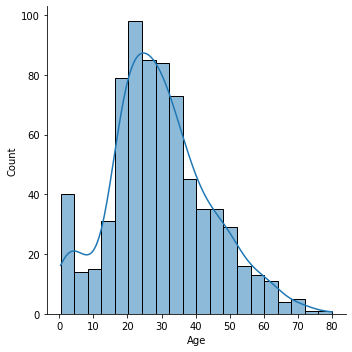

In [16]:
known_ages = train["Age"][train["Age"].notnull()]

sns.displot(known_ages, kde=True, palette="Paired")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


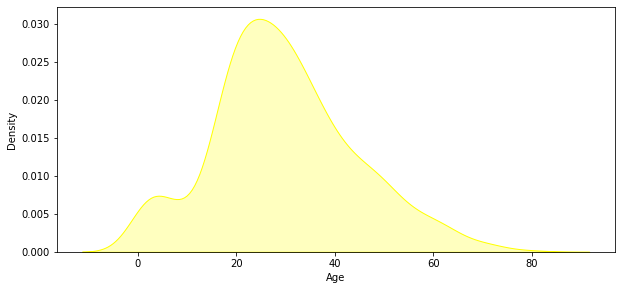

In [17]:
fig, ax = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"], kernel="gau", ax=ax,
color="yellow", shade=True, legend=True)

##**Correlation heatmap**

--- Fistly, correlation can be defined as the degree to which things move together. And there two types of correlation:
<br>
1) Positive 
<br>
2) Negative
<br>
Correlation ranges from -1.0 to +1.0
  
--- Correlation heatmaps are types of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.
<br>
---It can also be used to detect multi-collinearity or even outliers
<br>
**Multicollinearity** - is the occurence of high intercorrelations between two or more independent variables in a mulitple regression model.
<br>
In simple terms, we can say multicollinearity is when two or predictions in a regression are highly related to one another. Each of this does not provide unqiue and independent information to the regression.
<br>
**Multiple Regression** - a statistical technique used to analyze the relationship between a single dependent variable and multiple independent variables

Note: The heatmap does not include unfactorized categorical columns, it plots solely numerical columns

(7.0, 0.0)

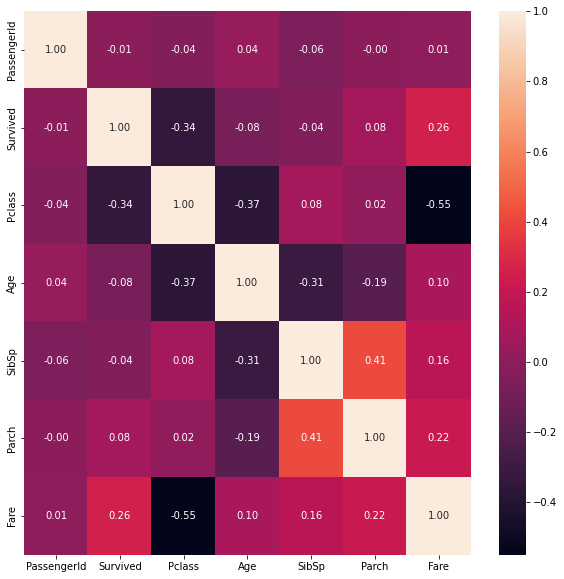

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f', ax=ax)
ax.set_ylim(7, 0)

In [19]:
def print_percentages(df, col_name, col_values):
    for x in col_values:
        group = df.loc[df[col_name] == x]
        print (" {0} Survival rate: {1:.3f}".format(x, group['Survived'].sum() / group.shape[0]))

In [20]:
print_percentages(train, 'Sex', ['male', 'female'])

 male Survival rate: 0.189
 female Survival rate: 0.742


##**Gender Against Survival**

A plot to check the survival rates with respect to the genders of the passengers.

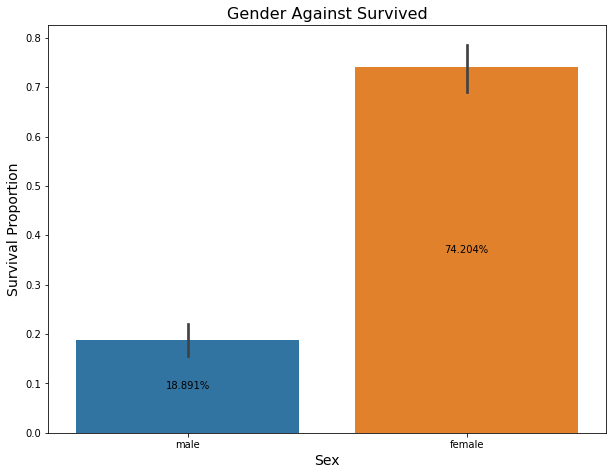

In [21]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.barplot(
    x="Sex",
    y="Survived",
    data=train,
    ax=ax,
    estimator=np.mean,
    linewidth=3
)

ax.set_title("Gender Against Survived", fontsize=16)
ax.set_xlabel("Sex", fontsize=14)
ax.set_ylabel("Survival Proportion", fontsize=14)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y,
        "{:.3%}".format(bar.get_height()),
        horizontalalignment='center', verticalalignment='center', color='black')
    

According to the plot above we can see that a lot of the female passengers aboard the ship survived,<br>
this leads us to make an hypothesis that females have a higher rate of survival than males.

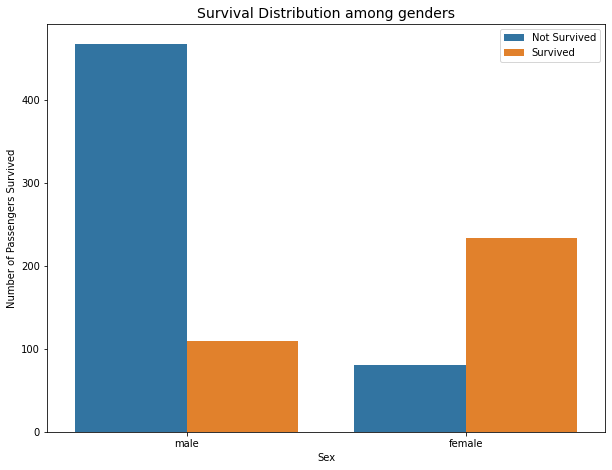

In [22]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.countplot(
    x="Sex",
    hue="Survived",
    data=train,
)

ax.set_title("Survival Distribution among genders", fontsize=14)
ax.set_xlabel("Sex")
ax.set_ylabel("Number of Passengers Survived")
ax.legend(["Not Survived", "Survived"])

##**Passenger Class against survived**

Here, the aim is to check to see how the passenger class affects the survival rate on the ship.<br>
Keeping in mind that Pclass 1 is the most expensive class followed by class 2 and 3.

Text(0, 0.5, '% of Passengers Survived')

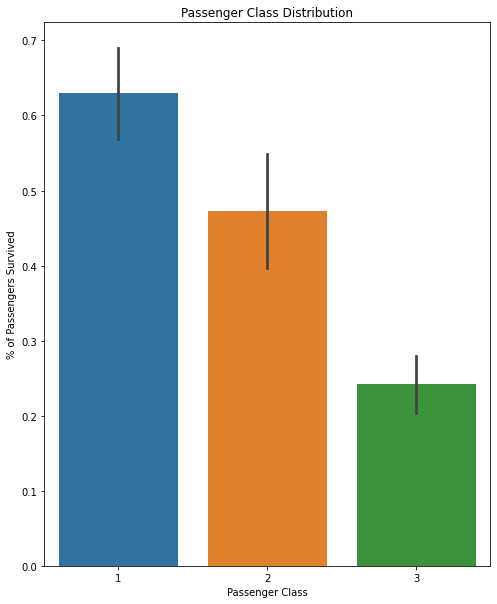

In [23]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
    x="Pclass",
    y="Survived",
    data=train,
    estimator=np.mean,
    ax=ax)

ax.set_title("Passenger Class Distribution")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("% of Passengers Survived")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


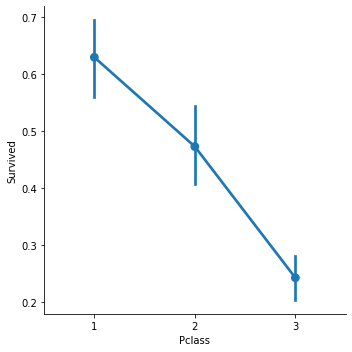

In [24]:
sns.catplot('Pclass', "Survived", kind='point', data=train)

Here we can also make an hypothesis that the passenger class has a role to play<br>
in the survival of the passengers.<br>
<hr>
This could however also mean that in relation to the visualization earlier of <br>
the relationship between gender and survival, there are more women in Pclass 3 than men hence the high survival rate.

## **Embarked Survived**

In [25]:
print_percentages(train, 'Embarked', ['S', 'C', 'Q'])

 S Survival rate: 0.337
 C Survival rate: 0.554
 Q Survival rate: 0.390


Text(0, 0.5, '% of Passengers Survived')

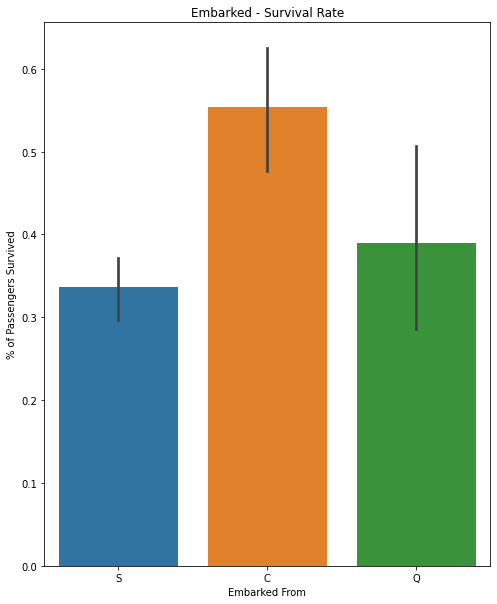

In [26]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
    x="Embarked",
    y="Survived",
    estimator = np.mean,
    data=train,
    ax=ax,
    linewidth=2
)
ax.set_title("Embarked - Survival Rate")
ax.set_xlabel("Embarked From")
ax.set_ylabel("% of Passengers Survived")

From this plot, we see that a lot of the passengers that boarded from Chernbourg survived, <br>
this could also mean that a lot of females boarded from Chernbourg and a large percentage of those <br>
who boarded boarded into Pclass 1

## **Pclass vs Embarked**

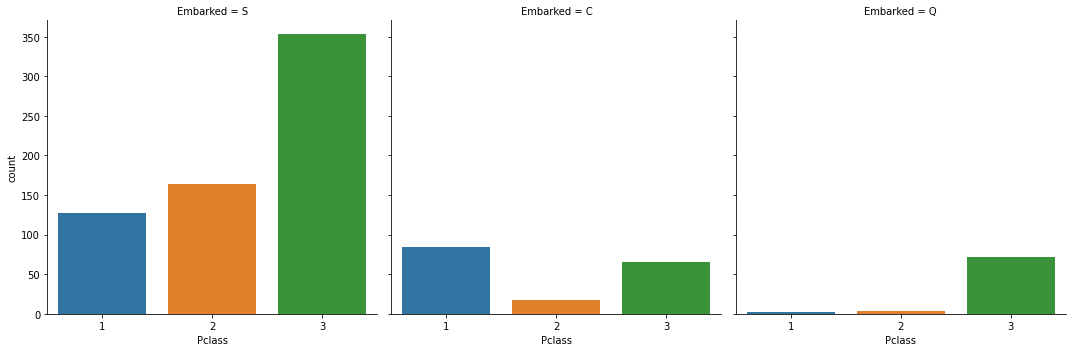

In [27]:
g = sns.catplot(
    x="Pclass", col='Embarked',
    data=train, kind="count"
)

Agreeing with the hypothesis, we see that there is a large amount of people boarding into Pclass 1<br> 
from Chernbourg

###**Gender vs. Embarked**

A plot to check the relationship between gender and where they boarded the ship from.

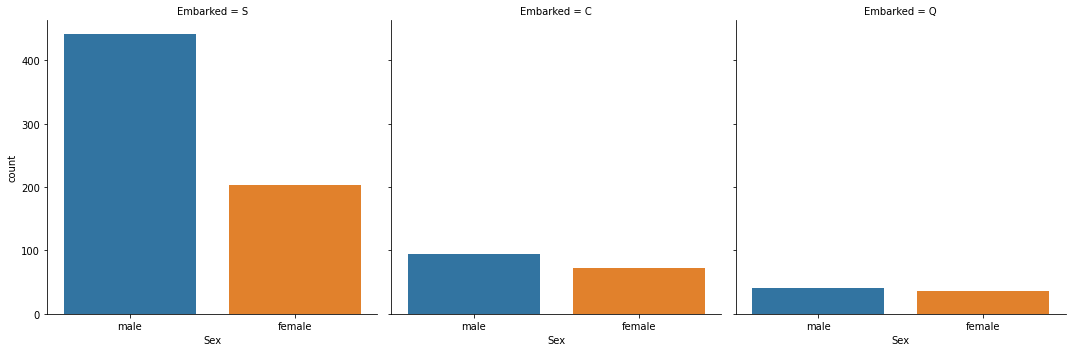

In [28]:
g = sns.catplot(
    x="Sex",
    col="Embarked",
    data=train,
    kind="count"
)

###**Age against Survived**

A plot to check the relationship between the age distribution in the dataset and the survival rate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


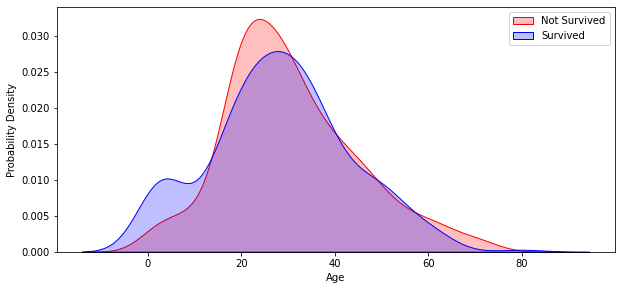

In [29]:
fig, ax = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (train['Age'].notnull())], kernel='gau',
ax=ax, color="red", shade=True, legend=True)

sns.kdeplot(
    data=train["Age"][(train['Survived'] == 1) & (train['Survived'].notnull())],
    kernel='gau',
    ax=ax,
    color="blue",
    shade=True
)

ax.set_xlabel("Age")
ax.set_ylabel("Probability Density")
ax.legend(
    ["Not Survived", "Survived"]
)

Here we see that we have a modal age interval between 20 and 40, this coul be to imply that a large percentage of the passengers on the ship were within this age range.<br>
Also, among those that survive we see that children seem to have been given higher priority than adults since we have a spike in our age - survival plot at the range from 0 - 5.
<br>
<br>
**It is also important to note that this plot is a pre-imputation and might not be a perfect representation of the dataset.**

### **Plot Against survived**

A plot to check the survival ratio among the passenger population on the ship.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


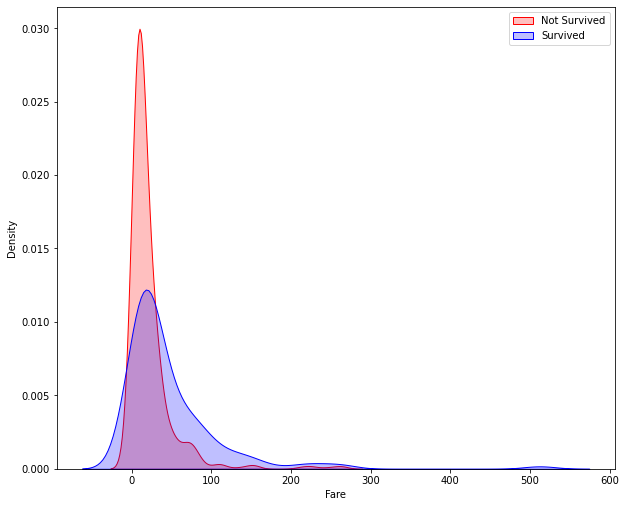

In [30]:
fig, ax = plt.subplots(figsize=(10, 8.5))

sns.kdeplot(
    data=train.loc[(train["Survived"] == 0), "Fare"],
    kernel='gau', ax=ax,
    color="red",
    shade=True
)

sns.kdeplot(
    data=train.loc[(train["Survived"] == 1), "Fare"],
    kernel='gau', ax=ax,
    shade=True,
    color="blue"
)

ax.legend(['Not Survived', 'Survived'])


Here, it is seen that a large percentage of the passengers on board did not survive.

In [31]:
print_percentages(train, 'Parch', [0, 1, 2, 3, 4, 5, 6])

 0 Survival rate: 0.344
 1 Survival rate: 0.551
 2 Survival rate: 0.500
 3 Survival rate: 0.600
 4 Survival rate: 0.000
 5 Survival rate: 0.200
 6 Survival rate: 0.000


### **Parch vs. Survived**

A plot to check the relationship between the number of parents/children each passenger and the survival rate

Text(0, 0.5, '% of Passenger Survived')

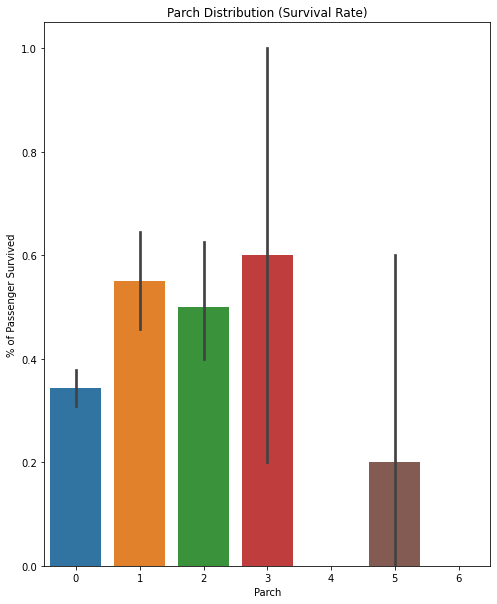

In [32]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
    x="Parch",
    y="Survived",
    estimator=np.mean,
    data=train,
    ax=ax,
    linewidth=2
)

ax.set_title("Parch Distribution (Survival Rate)")
ax.set_xlabel("Parch")
ax.set_ylabel("% of Passenger Survived")


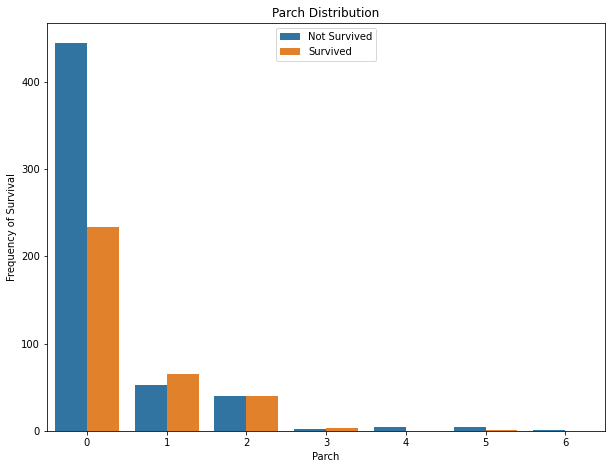

In [33]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.countplot(
    x="Parch",
    data=train,
    hue="Survived",
    linewidth=2
)

ax.set_title("Parch Distribution")
ax.set_xlabel("Parch")
ax.set_ylabel("Frequency of Survival")
ax.legend(["Not Survived", "Survived"])

Here, it is evident that those with no parents/children had a lower survival ratio

In [34]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [35]:
print_percentages(train, 'SibSp', [0, 1, 2, 3, 4, 5, 6])

 0 Survival rate: 0.345
 1 Survival rate: 0.536
 2 Survival rate: 0.464
 3 Survival rate: 0.250
 4 Survival rate: 0.167
 5 Survival rate: 0.000
 6 Survival rate: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


### **SibSp vs. Survived**
<br>
A plot to check the ratio between the total number of siblings each passenger has and their survival.

Text(0, 0.5, 'Survival Percentage')

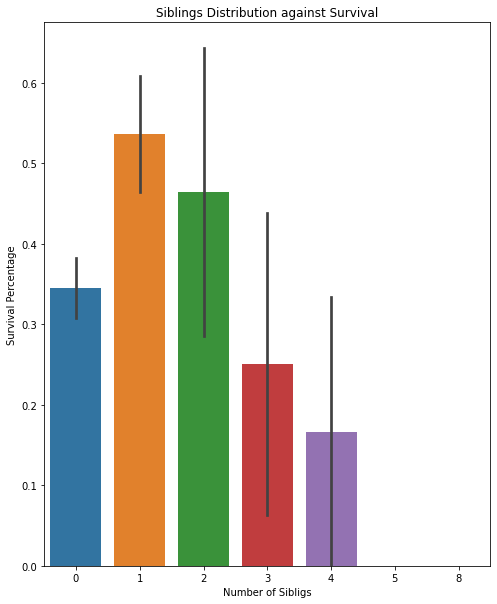

In [36]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.barplot(
    x="SibSp",
    y="Survived",
    estimator=np.mean,
    data=train,
    ax=ax
)

ax.set_title("Siblings Distribution against Survival")
ax.set_xlabel("Number of Sibligs")
ax.set_ylabel("Survival Percentage")

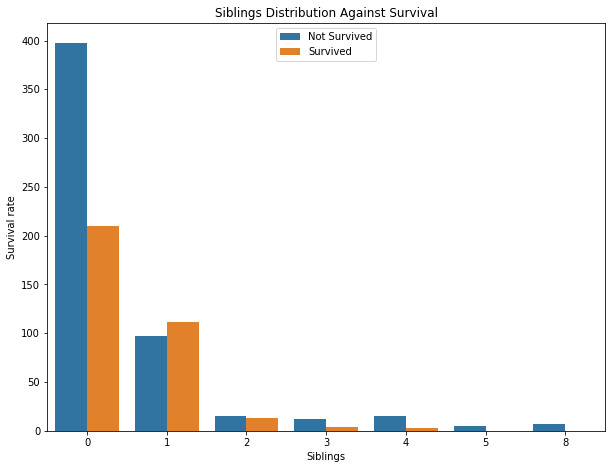

In [37]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.countplot(
    x="SibSp",
    hue="Survived",
    data=train, 
    linewidth=2
)

ax.set_title("Siblings Distribution Against Survival")
ax.set_xlabel("Siblings")
ax.set_ylabel("Survival rate")
ax.legend(["Not Survived", "Survived"])

## **Feature Engineering**
---Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.
<br>
---More so, Feature selection offers a simple yet effective way to overcome this challenge by eliminating redundant and irrelevant data. Removing the irrelevant data improves learning accuracy, reduces the computation time, and facilitates an enhanced understanding for the learning model or data.
<br>
The aim of this step is to check our dataset and check our features to see the ones that are fit and needed for the training of our model.
<br>
In this step we do thing like dropping unnecessary features, engineering new features from exsisting features, scaling our features and encoding
<br>
Some techinques involved in feature enginerring incudes;
<br>
1) Imputation
<br>
2) Discretization
<br>
3) Categorical Encoding
<br>
4) Feature Splitting
<br>
5) Handling Outliers
<br>
6) Variable Transformations
<br>
7) Scaling
<br> 
8) Creating Features

## **Missing Values**

<br>
In fiilling missing values, we use information from a heatmap to check the features relations with other features in the dataset in order to have a better approximation of what to impute the missing values with.

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

###  **Fare Test set against the Training set**

Here we check the median of the values in the parch and Pclass features and then select the median value coressponding to a passenger with Pclass 3 and 0 dependents

In [40]:
median_fare = test.groupby(['Pclass', 'Parch']).Fare.median()[3][0]

median_fare

7.8542

In [41]:
# filling the missing values in the fares feature with the median
test['Fare'] = test['Fare'].fillna(median_fare)

###**Checking the Test set against the training set**

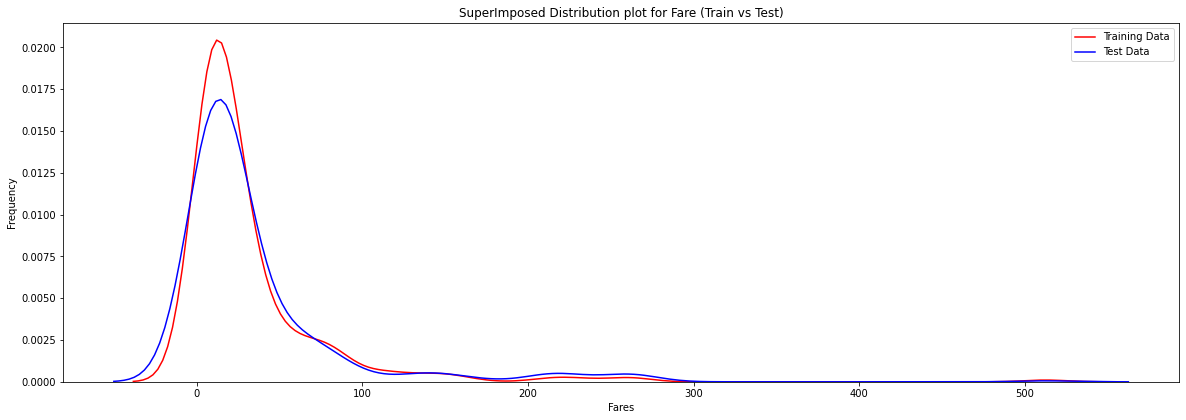

In [42]:
fig, ax = plt.subplots(figsize=(20, 6.6))

sns.kdeplot(train.Fare, color="red", label="Training Data", ax=ax)
sns.kdeplot(test.Fare, label="Test Data", color='blue', ax=ax)

ax.set_title("SuperImposed Distribution plot for Fare (Train vs Test)")
ax.set_ylabel("Frequency")
ax.set_xlabel("Fares")
ax.legend()

##**Embarked**

In [43]:
test.Embarked.isnull().sum()

0

In [44]:
train.Embarked.isnull().sum()

2

In [45]:
# Checking the rows with missing values
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Borrowing from the EDA performed on Embarked earlier, it is safe to assume the passengers who bought Pclass 1 tickets are from the "richest" town which is Southhampton

In [46]:
train["Embarked"] = train["Embarked"].fillna('S')

##**Age**

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We have a lot of missing values in both the test and training set

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


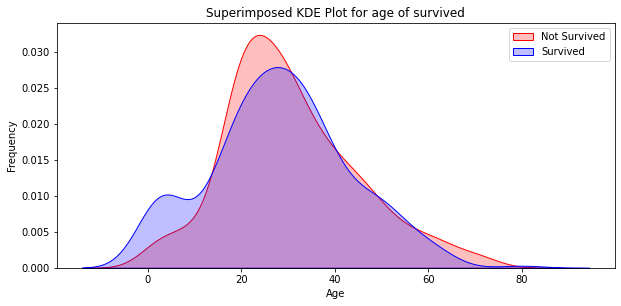

In [49]:
# Exploring the age distribution in train set
fig, ax = plt.subplots(figsize=(10, 4.5))

preimputation=sns.kdeplot(
    data=train["Age"][(train['Survived'] == 0) & (train['Age'].notnull())],
    kernel='gau',
    label="Not Survived",
    ax=ax,
    color='red',
    shade=True,
    legend=True
)

preimputation = sns.kdeplot(
    data=train["Age"][(train['Survived'] == 1) & (train['Age'].notnull())],
    kernel='gau',
    label="Survived",
    ax=ax,
    color='Blue',
    shade=True,
    legend=True
)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Superimposed KDE Plot for age of survived")
ax.legend()

In [50]:
# Creating a copy of the training set to test out the options
copy2 = train.copy()
missing_age_rows = copy2.Age.isna()

In [51]:
missing_age_rows

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [52]:
age_median_pclass_sibsp = copy2.groupby(['Pclass', 'SibSp'])['Age'].median()
age_median_pclass_sibsp


Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8         NaN
Name: Age, dtype: float64

Passengers with Pclass 3 and sibsp 8 all have missing values so we impute it with the values from pclass 3 sibsp 5 since its the closest to it in the dataset


In [53]:
age_median_pclass_sibsp[3][8] = age_median_pclass_sibsp[3][5]

In [54]:
age_median_pclass_sibsp

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8        11.0
Name: Age, dtype: float64

In [55]:
# imputting the values
copy2.Age = copy2.groupby(['Pclass', 'SibSp'])["Age"].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [56]:
copy2.Age = copy2.Age.fillna(11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


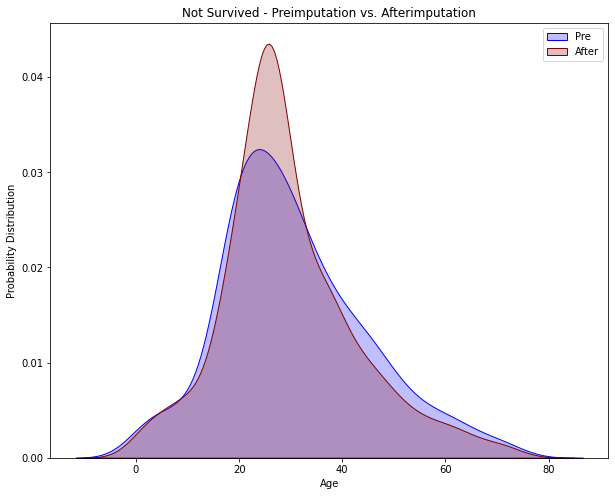

In [57]:
# Compare the distributions
fig, ax = plt.subplots(figsize=(10, 8))

preimputation=sns.kdeplot(
    data=train['Age'][(train["Survived"] == 0) & (train["Age"].notnull())],
    kernel='gau', ax=ax, color="Blue", shade=True,
    legend=True, label="Pre"
)

afterimputation = sns.kdeplot(
    data=copy2["Age"][(copy2["Survived"] == 0) & (copy2["Age"].notnull())],
    kernel='gau', legend=True,
    ax=ax, color='maroon', shade=True,
    label="After"
)

ax.set_title("Not Survived - Preimputation vs. Afterimputation")
ax.set_xlabel("Age")
ax.set_ylabel("Probability Distribution")
ax.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


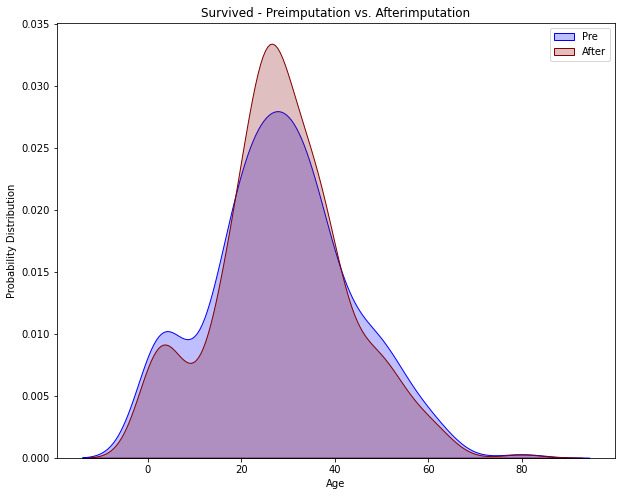

In [58]:
# Compare the distributions
fig, ax = plt.subplots(figsize=(10, 8))

preimputation = sns.kdeplot(
    data=train['Age'][(train["Survived"] == 1) & (train["Age"].notnull())],
    kernel='gau', ax=ax, color="Blue", shade=True,
    legend=True, label="Pre"
)

afterimputation = sns.kdeplot(
    data=copy2["Age"][(copy2["Survived"] == 1) & (copy2["Age"].notnull())],
    kernel='gau', legend=True,
    ax=ax, color='maroon', shade=True,
    label="After"
)

ax.set_title("Survived - Preimputation vs. Afterimputation")
ax.set_xlabel("Age")
ax.set_ylabel("Probability Distribution")
ax.legend()


In [59]:
copy5 = train.copy()
copy5["Age"].fillna(copy5['Age'].median(), inplace=True)

In [60]:
train = copy2

We can see that after imputation the age feature in our dataset is much more defined having its modes being more defined.

## **Test Set**

In [61]:
test_age_pclass_sibsp = test.groupby(['Pclass', 'SibSp']).median()['Age']
test.Age = test.groupby(["Pclass", "SibSp"])["Age"].apply(lambda x: x.fillna(x.median()))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## **Outliers**
--- In statistics, an outlier is a data point that differs significantly from other observations.
<br>
Here we find the outliers in the dataset by employing tuckey's fences.
Basically tuckey's functions help to define a range outside which values are defined as outliers.
<br>


<br>
High = (Q3) + 1.5 IQR<br>
Low = (Q1) – 1.5 IQR<br>

<br>
outilers are values outside the range (low, high)

In [62]:
def outliers(df, n, cols):
    """
        A function to detect outliers in a dataset using
        Tukey's Fences
        ( (Q1 - k(Q3 - Q1)), (Q3 + k(Q3 - Q1)) ),
        where Q1 -> lower quartile
              Q2 -> upper quartile
    """
    out_indices = []
    for col in cols:

        #lower quartile
        q1 = np.nanpercentile(df[col], 25)

        # Upper Quartile
        q3 = np.nanpercentile(df[col], 75)

        #Interquartile range
        iqr = q3 - q1

        #outlier step
        outlier_step = 1.5 * iqr

        # Determine the indices of the outliers
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index

        print(col, q1-outlier_step, q3+outlier_step)

        out_indices.extend(outlier_list_col)
    
    out_indices = Counter(out_indices)
    multiple_outliers = list(k for k, v in out_indices.items() if v > n)

    return multiple_outliers


    


In [63]:
to_drop = outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"])
to_drop


Age -0.5 59.5
SibSp -1.5 2.5
Parch 0.0 0.0
Fare -26.724 65.6344


[438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

There is an issue here with the parch column, it's range is from (0.0, 0.0) and this means every other value in the dataset will be seen as an outlier.<br>
This means that virtually every value in the parch feature of our dataset will be regarded an outlier

In [64]:
train.loc[to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,11.0,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,11.0,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,11.0,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,11.0,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S


## **Finding Columns Individually**

In [65]:
def individual_outlier(col):
    """A function to find outlier in a specified column from a dataset"""
    
    # sorting column since quartile ranges need to be in order
    sorted(col)
    q1, q3 = np.nanpercentile(col, [25, 75])
    iqr = q3 - q1

    # getting the lower and upper range as defined by tuckey's fences
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)

    return lower_range, upper_range




In [66]:
# Using just the numerical columns and excluding the categorical columns
cols = ['Age', 'Fare', 'Parch', 'SibSp']

for col in cols:
    print(f'Upper and Lower bound for {col}: ',
          individual_outlier(train[col]), sep="\n")


Upper and Lower bound for Age: 
(-0.5, 59.5)
Upper and Lower bound for Fare: 
(-26.724, 65.6344)
Upper and Lower bound for Parch: 
(0.0, 0.0)
Upper and Lower bound for SibSp: 
(-1.5, 2.5)


##**Features to add or drop**

Examples of features to be dropped include:
 * Features with high collinearity
 * features that are of no significance to the model
 * Features with too many categories eg Name, although it is important to note       that useful features could be engineered from these features
       

In [67]:
for col in train.columns:
    print(f"Number of Unique values for {col} is ", train[col].nunique())

Number of Unique values for PassengerId is  891
Number of Unique values for Survived is  2
Number of Unique values for Pclass is  3
Number of Unique values for Name is  891
Number of Unique values for Sex is  2
Number of Unique values for Age is  89
Number of Unique values for SibSp is  7
Number of Unique values for Parch is  7
Number of Unique values for Ticket is  681
Number of Unique values for Fare is  248
Number of Unique values for Cabin is  147
Number of Unique values for Embarked is  3


## **Dropping Ticket and PassengerID**

We drop these as they seem to be entirely randomized, although it is important to note that this is just an hypothesis as there might be an underlying pattern

In [68]:
# Dropping PassengerId feature from test and training sets
train.drop(['PassengerId'], inplace=True, axis=1)
test.drop(['PassengerId'], inplace=True, axis=1)

In [69]:
train.drop(['Ticket'], inplace=True, axis=1)
test.drop(['Ticket'], inplace=True, axis=1)

### **Feature Engineering from Names**
We try to engineer some features from the name column. <br>
The argument is that the titles attached to the names might in some way indicate that people of a particular social class had a higher rate of survival than other socail classes.

In [70]:
train["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [71]:
def seperate_name(data):
    """A function to seperate the names in a column to
        first names, surnames, and titles."""

    families = []
    titles = []
    new_name = []

    #Checking each row in the dataset
    for i in range(len(data)):
        name = data.iloc[i]

        # Extract the names in brackets
        if '(' in name:
            name_ex_bracket = name.split('(')[0]
        else:
            name_ex_bracket = name
        
        family = name_ex_bracket.split(",")[0]
        title = name_ex_bracket.split(",")[1].strip().split(" ")[0]

        for c in string.punctuation:
            name = name.replace(c, "").strip()
            family = family.replace(c, "").strip()
            title = title.replace(c, "").strip()\

        families.append(family)
        titles.append(title)
        new_name.append(name)

    return families, titles, new_name

In [72]:
seperate_name(train.Name)

(['Braund',
  'Cumings',
  'Heikkinen',
  'Futrelle',
  'Allen',
  'Moran',
  'McCarthy',
  'Palsson',
  'Johnson',
  'Nasser',
  'Sandstrom',
  'Bonnell',
  'Saundercock',
  'Andersson',
  'Vestrom',
  'Hewlett',
  'Rice',
  'Williams',
  'Vander Planke',
  'Masselmani',
  'Fynney',
  'Beesley',
  'McGowan',
  'Sloper',
  'Palsson',
  'Asplund',
  'Emir',
  'Fortune',
  'ODwyer',
  'Todoroff',
  'Uruchurtu',
  'Spencer',
  'Glynn',
  'Wheadon',
  'Meyer',
  'Holverson',
  'Mamee',
  'Cann',
  'Vander Planke',
  'NicolaYarred',
  'Ahlin',
  'Turpin',
  'Kraeff',
  'Laroche',
  'Devaney',
  'Rogers',
  'Lennon',
  'ODriscoll',
  'Samaan',
  'ArnoldFranchi',
  'Panula',
  'Nosworthy',
  'Harper',
  'Faunthorpe',
  'Ostby',
  'Woolner',
  'Rugg',
  'Novel',
  'West',
  'Goodwin',
  'Sirayanian',
  'Icard',
  'Harris',
  'Skoog',
  'Stewart',
  'Moubarek',
  'Nye',
  'Crease',
  'Andersson',
  'Kink',
  'Jenkin',
  'Goodwin',
  'Hood',
  'Chronopoulos',
  'Bing',
  'Moen',
  'Staneff',
  '

**Adding them as features in the dataset**

In [73]:
train["Surname"], train["Title"], train["Newname"] = seperate_name(train.Name)
test["Surname"], test["Title"], test["Newname"] = seperate_name(test.Name)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry


In [74]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

**Generalizing the titles**

In [75]:
train['Title'] = train['Title'].replace(['Ms', 'Mlle'], 'Miss')
train['Title'] = train['Title'].replace(['Mme'], 'Mrs')
train['Title'] = train['Title'].replace(["Dr", 'Rev', 'the', 'Jonkheer', 'Lady', 'Sir', 'Don'], "Noble")
train['Title'] = train['Title'].replace(["Major", "Col", "Capt"], "Navy")

train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Noble      18
Navy        5
Name: Title, dtype: int64

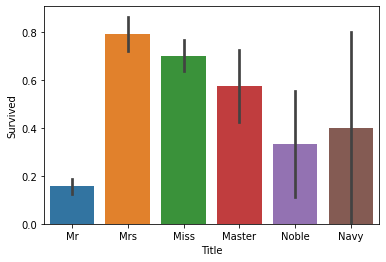

In [76]:
sns.barplot(x='Title', y="Survived", data = train)

Seems there are more males in the noble class for it to have such a low survival rate. <br>
This would support what we learnt from earlier analysis concerning the survival rate of males in general

In [77]:
nobles_survived = train[train["Title"] == "Noble"].groupby(['Sex'])["Survived"].value_counts()
nobles_survived

Sex     Survived
female  1            3
male    0           12
        1            3
Name: Survived, dtype: int64

All female nobles (Just three of them) survived, while of the 15 male nobles just 12 survived


**Repeating for test data**

In [78]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [79]:
test['Title'] = test['Title'].replace(["Ms", 'Dona'], 'Miss')
test['Title'] = test['Title'].replace(["Dr", 'Rev'], "Noble")
test['Title'] = test['Title'].replace(['Col'], 'Navy')

In [80]:
test['Title'].value_counts()

Mr        240
Miss       80
Mrs        72
Master     21
Noble       3
Navy        2
Name: Title, dtype: int64

#### **Cabin**

In [81]:
train["Cabin"].isnull().sum()

687

In [82]:
test["Cabin"].isnull().sum()

327

Too many missing values

In [83]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

categorising the cabin types

In [84]:
def cabin_sep(data):
    """Function to seperate the cabins into their various types"""
    cabin_type = []

    for i in range(len(data)):

        if data.isnull()[i] == True:
            cabin_type.append("M")
        else:
            cabin = data[i]
            cabin_type.append(cabin[:1])

    return cabin_type

In [85]:

train['Cabin'] = train['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])
train.Cabin


0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [86]:
train.Cabin.value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [87]:
idx = train[train.Cabin == 'T'].index
train.loc[idx, 'Cabin'] = 'A'
train.Cabin.value_counts()



M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: Cabin, dtype: int64

In [88]:
test["Cabin"] = test["Cabin"].fillna("M").astype(str).apply(lambda cabin: cabin[0])
test.Cabin.value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

**Encoding**

In [89]:
train_cat_features = ['Pclass', 'Sex', 'Title', 'Cabin', 'Embarked']

for feature in train_cat_features:
    
    # Instead of using sklearn's oneHot encoder, we use pandas get dummies 
    # method to imitate one hot encoding
    dummies = pd.get_dummies(train[feature]).add_prefix(feature + '_')
    train = train.join(dummies)

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,M,S,...,0,0,0,0,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,...,0,1,0,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,M,S,...,0,0,0,0,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,...,0,1,0,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,M,S,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,M,S,...,0,0,0,0,0,0,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,...,1,0,0,0,0,0,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,M,S,...,0,0,0,0,0,0,1,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,...,0,1,0,0,0,0,0,1,0,0


In [90]:
for feature in train_cat_features:
    dummies = pd.get_dummies(test[feature]).add_prefix(feature + "_")
    test = test.join(dummies)

In [91]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,M,Q,Kelly,...,0,0,0,0,0,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,M,S,Wilkes,...,0,0,0,0,0,0,1,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,M,Q,Myles,...,0,0,0,0,0,0,1,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,M,S,Wirz,...,0,0,0,0,0,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,M,S,Hirvonen,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,M,S,Spector,...,0,0,0,0,0,0,1,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,C,Oliva y Ocana,...,0,1,0,0,0,0,0,1,0,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,M,S,Saether,...,0,0,0,0,0,0,1,0,0,1
416,3,"Ware, Mr. Frederick",male,24.0,0,0,8.0500,M,S,Ware,...,0,0,0,0,0,0,1,0,0,1


# **ML Modelling**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sfk


##**Dropping the Columns not needed while modeling.**

--- Only the needed colums were convered to numeric form.

In [93]:
drop_cols = ['Pclass', 'Name', 'Sex', "Cabin", 'Embarked', 'Surname', 'Title', 'Newname']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)


## **Seperating the data from label**

In [94]:
train_set = train.drop("Survived", axis=1)
train_set_sur = train["Survived"]

## **Cross-Validation**
--Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. 
<br>
---Here we evalate and compare learning algorithm by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

In [95]:
x_train, x_test, y_train, y_test = train_test_split(
    train_set, train_set_sur,
    train_size=0.8, random_state=0
)

In [96]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 26) (712,)
(179, 26) (179,)


### **Scaling**

In [97]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

## Fit and transform train dataset
x_train = std.fit_transform(x_train)

x_test = std.transform(x_test)

In [98]:
test = std.transform(test)

In [99]:
test.std()

1.0015287515279199

##**Logistic Regression**
--It is used for modeling.
<br>
--Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
<br>
--It is used for modeling.


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()

logreg.fit(x_train, y_train)


pred = logreg.predict(x_test)


print("Accuracy: {}".format(round(accuracy_score(y_test, pred), 8)))

Accuracy: 0.82681564


In [101]:
def confusion_matrix_model(model):
    cm = confusion_matrix(y_test, model.predict(x_test))
    col = ["Predicted Dead", "Predicted Survived"]
    cm = pd.DataFrame(cm)
    cm.columns = col
    cm.index = ["Actual Dead", "Actual Survived"]
    cm[col] = np.around(
        cm[col].div(cm[col].sum(axis=1), axis=0), decimals=2
    )
    return cm

In [102]:
confusion_matrix_model(logreg)

,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.22,0.78


LogisticRegression auc is 0.87378129


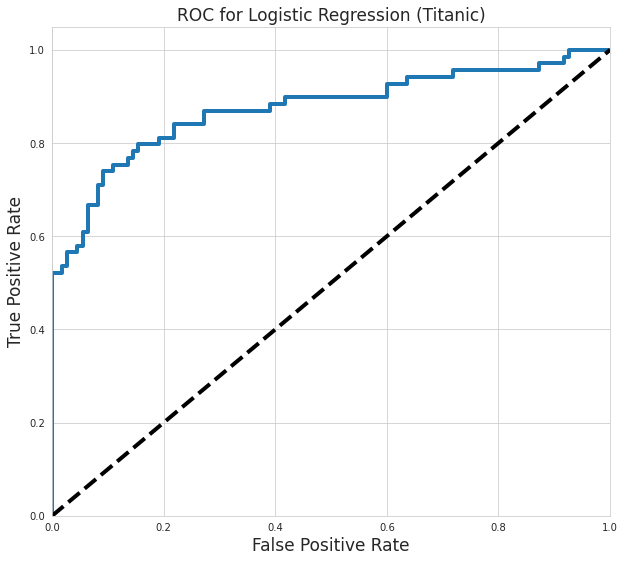

In [103]:
from sklearn.metrics import roc_curve, auc
sns.set_style('whitegrid')

y_score = logreg.decision_function(x_test)

fpr, tpr, thr = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

print(logreg.__class__.__name__+" auc is %2.8f" % roc_auc)


plt.figure(figsize=[10, 9])
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize=17)
plt.show()

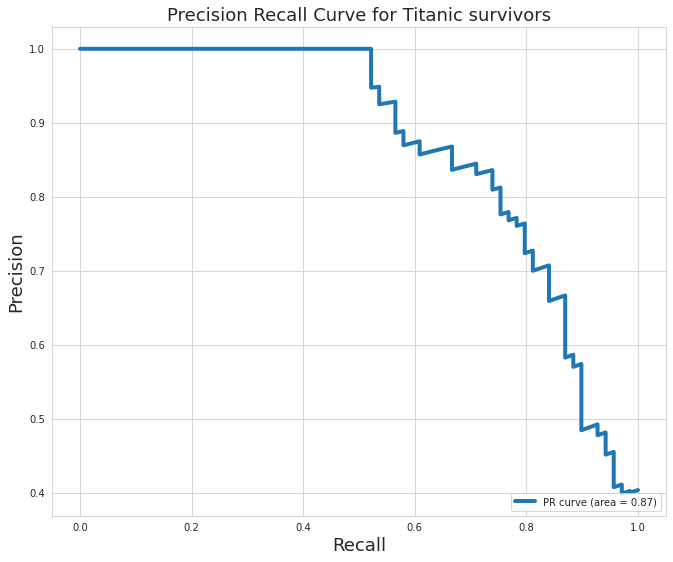

In [104]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11, 9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' %
         PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()


## **Cross-Validation**
--- It is also called rotational estimation or out of sampling testing.
--- It is resampling method that uses different portions of thedata to test and train a mdel on different iterations.


In [105]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [106]:
x = train_set
y = train_set_sur

In [107]:
x = std.fit_transform(x)

In [108]:
from sklearn.model_selection import cross_val_score

def acc_score(model):
    return np.mean(cross_val_score(model, x, y, cv=k_fold, scoring="accuracy"))

In [109]:
log_reg = LogisticRegression()

print("Accuracy Scores: " + format(cross_val_score(log_reg, x, y, cv=k_fold, scoring="accuracy")))

print("\n")

print("Mean Accuracy Score: " + str(acc_score(log_reg)))

print("Standard Deviation: ", cross_val_score(log_reg, x, y, cv=k_fold, scoring="accuracy").std())

Accuracy Scores: [0.87777778 0.80898876 0.82022472 0.82022472 0.80898876 0.80898876
 0.83146067 0.84269663 0.79775281 0.87640449]


Mean Accuracy Score: 0.8293508114856429
Standard Deviation:  0.02674065504776722


In [110]:
scores_auc = cross_val_score(log_reg, x, y, cv=k_fold, scoring="roc_auc")

print("AUC score for 10 fold cross validation:", scores_auc)

print("Mean AUC score for 10 fold Cross Validation:", scores_auc.mean())

AUC score for 10 fold cross validation: [0.9089995  0.84067797 0.83147942 0.85324948 0.89008363 0.83036707
 0.83333333 0.90378198 0.87948718 0.91438703]
Mean AUC score for 10 fold Cross Validation: 0.8685846591559947


## **Conclusion**

--- In conclusion, 80% of the data was used to train while the remaining 20% was used to train the data.
---It was discovered that 38% of people survived during the Titanic disaster. Also linear regression model gave an accuracy of 82%.